# Intro

[Working group page](https://community.ai.science/drone-image-classification-of-urban-green-spaces)

Goals
1. Tree count / tree detection   
2. Tree type classification

Steps:
1. Label dataset
2. Set up Keras model
3. Train
4. Evaluate
5. Optimize

# Tutorials

Basics:
- [Object detection and bounding box basic tutorial (Single bounding box per image)](https://pyimagesearch.com/2020/10/05/object-detection-bounding-box-regression-with-keras-tensorflow-and-deep-learning/)
- [Fine-tuning a model with keras](https://pyimagesearch.com/2019/06/03/fine-tuning-with-keras-and-deep-learning/)
- [Multi-object single class detection with keras](https://machinelearningmastery.com/how-to-train-an-object-detection-model-with-keras/)

Project specific:
- [Deep learning in forestry review](https://www.mdpi.com/2072-4292/13/14/2837/htm)
- [Using YOLO overview](https://github.com/pjreddie/darknet/wiki/YOLO:-Real-Time-Object-Detection)
    - Darknet wants a .txt file for each image with a line for each ground truth object in the image that looks like \<object-class> \<x> \<y> \<width> \<height>
- [Training YOLOv5 on custom data](https://blog.paperspace.com/train-yolov5-custom-data/)

# Filter Tests

## Import

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from PIL import Image, ImageOps

In [4]:
test = Image.open('DJI_0801.JPG')

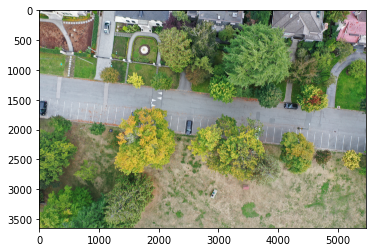

In [5]:
plt.imshow(test)

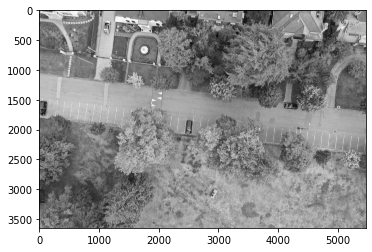

In [35]:
gray = ImageOps.grayscale(test)
gray_array = np.asarray(gray)
plt.imshow(gray_array, cmap = 'gray')

Text(0.5, 1.0, 'Canny filter, $\\sigma=3$')

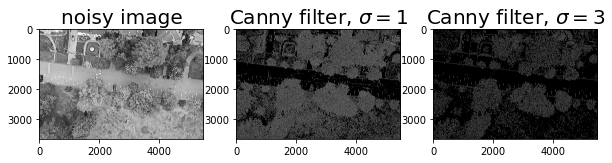

In [37]:
edges1 = canny(gray_array, sigma = 1)
edges2 = canny(gray_array, sigma=2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

ax[0].imshow(gray_array, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

In [57]:
!pip install opencv-python

     |████████████████████████████████| 89.9 MB 105 kB/s  eta 0:00:01     |█████████████▊                  | 38.5 MB 5.7 MB/s eta 0:00:10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Command errored out with exit status 1:
   command: /opt/anaconda3/bin/python /opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /var/folders/r6/fys6jqz12zg0mt2n15r5gw3m0000gq/T/tmpwjr8hz90
       cwd: /private/var/folders/r6/fys6jqz12zg0mt2n15r5gw3m0000gq/T/pip-install-81ymsgfd/opencv-python_00ffbb2448cc48fbb5f8b3b0321e1595
  Complete output (2559 lines):
  Not searching for unused variables given on the command line.
  CMake Error: CMake was unable to find a build program corresponding to "Ninja".  CMAKE_MAKE_PROGRAM is not set.  You probably need to select a different build tool.
  -- Configuring incomplete, errors occurred!
  See also "/private/var/folders/r6/fys6jq

In [58]:
import cv2 as cv

img = cv.imread('DJI_0801.JPG',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

ModuleNotFoundError: No module named 'cv2'

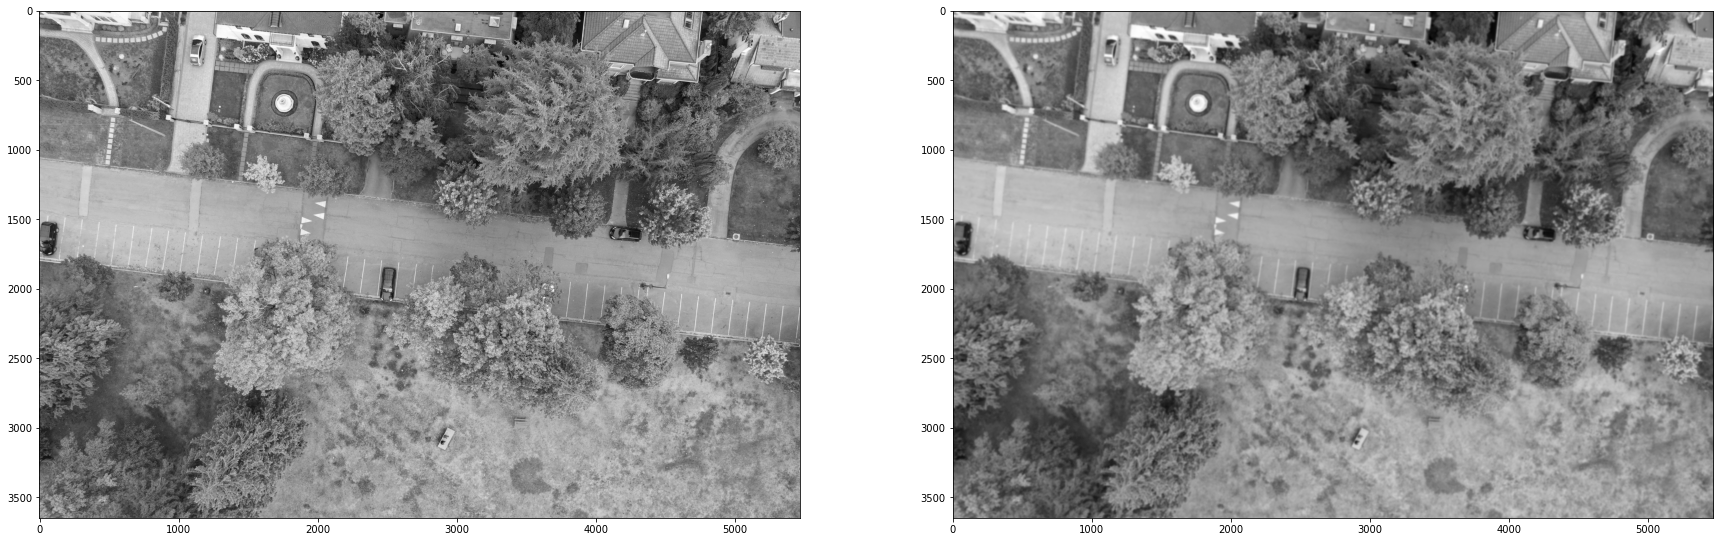

In [49]:
from skimage.filters import gaussian

fig = plt.figure(figsize=(30, 15))
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

gauss = gaussian(gray_array, sigma=5)

ax1.imshow(gray_array, cmap='gray')
ax2.imshow(gauss, cmap='gray')

Text(0.5, 1.0, 'elevation_map')

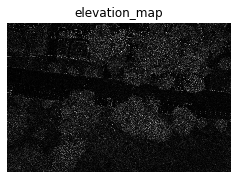

In [26]:
from skimage.filters import sobel
from skimage import morphology

elevation_map = sobel(gray_array)

fig, ax = plt.subplots(figsize=(4, 3))

ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')

ax.axis('off')

ax.set_title('elevation_map')

/var/folders/r6/fys6jqz12zg0mt2n15r5gw3m0000gq/T/ipykernel_80482/3829862867.py:9: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  raw_segments = slic(gray_array


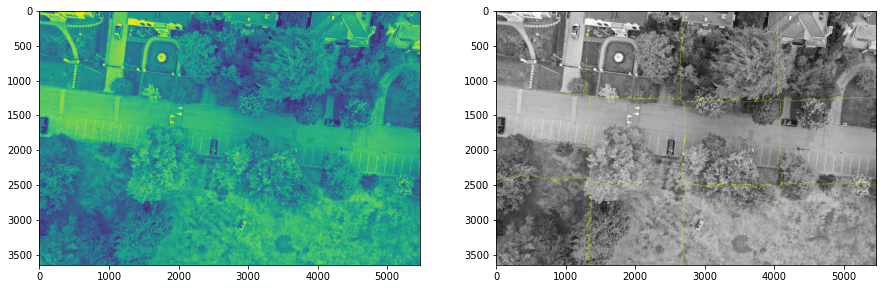

In [34]:
# Importing required boundaries
from skimage.segmentation import slic, mark_boundaries

# Setting the plot figure as 15, 15
plt.figure(figsize=(15, 15))
 
# Applying SLIC segmentation
# for the edges to be drawn over
raw_segments = slic(gray_array
                    ,
                          n_segments=12,
                          compactness=1)
 
plt.subplot(1, 2, 1)
 
# Plotting the original image
plt.imshow(gray_array)
 
# Detecting boundaries for labels
plt.subplot(1, 2, 2)
 
# Plotting the ouput of marked_boundaries
# function i.e. the image with segmented boundaries
plt.imshow(mark_boundaries(gray_array, raw_segments))